Page View Time Series Visualizer

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/csvs/fcc-forum-pageviews.csv')

In [63]:
# filter out top 2.5% and bottom 2.5% views
values_arr = df['value'].to_numpy()
sorted_values = np.sort(values_arr)

# top 2.5% means values higher than 97.5% of other values
percentToItems = 0.025 * len(sorted_values) # 32.6
# so: top 33 items, bottom 33 items

low_bound = max(sorted_values[0:33]) # inclusive indexing
high_bound = min(sorted_values[len(sorted_values) - 33:len(sorted_values)])

# clear low values and high values from df
no_low_df = df[df.value > low_bound]
no_high_df = no_low_df[no_low_df.value < high_bound]

# reassign df destructively
df = no_high_df

In [7]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [85]:
def draw_line_plot():
  fig, ax = plt.subplots()
  ax.plot(df['date'], df['value'])
  start, end = ax.get_xlim()
  ax.xaxis.set_ticks(np.arange(start, end, 250))
  plt.xlabel('Date')
  plt.ylabel('Page Views')
  plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

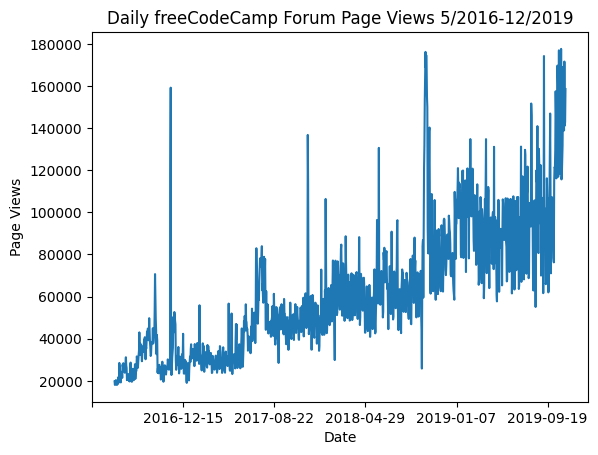

In [86]:
draw_line_plot()

In [87]:
df

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


In [50]:
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/csvs/fcc-forum-pageviews.csv')

def draw_bar_plot():
  # average daily page views for each month

  # year # month # average value
  date_arr = df['date'].to_numpy().tolist()
  df['month'] = [date_arr[date_arr.index(i)][5:7] for i in date_arr]
  df['year'] = [date_arr[date_arr.index(i)][0:4] for i in date_arr]
  # create a new df
  formatted_df = pd.DataFrame()
  years = []
  months = []
  month_avgs = []
  # for each year, for each month, compute the average value
  year_set = set(df['year'].to_numpy().tolist())
  for yr in year_set:
    current_year_df = df[df.year == yr]
    current_month_set = set(current_year_df['month'].to_numpy().tolist())
    for mon in current_month_set:
      # get the df of the current year, of the current month
      current_month_df = current_year_df[current_year_df.month == mon]
      # the values in this dataframe
      month_vals_arr = current_month_df['value'].to_numpy()
      avg_val = np.mean(month_vals_arr)
      years.append(yr)
      months.append(mon)
      month_avgs.append(avg_val)

  formatted_df['year'] = years
  formatted_df['month'] = months
  formatted_df['avg'] = month_avgs

  formatted_df.sort_values(by=['year'])

  # account for lost data
  for x in range(1, 5):
    formatted_df.loc[-1] = [2016, '0' + str(x), 0]
    formatted_df.index = formatted_df.index + 1
    formatted_df = formatted_df.sort_index()

  month_vals = {}
  months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
            'August', 'September', 'October', 'November', 'December']

  for x in range(1, 13):
    curr_month = ''
    if (x < 10):
      curr_month = '0' + str(x)
      month_vals.update({months[x - 1]: formatted_df[formatted_df.month == curr_month]['avg'].to_numpy().tolist()})
    else:
      curr_month = str(x)
      month_vals.update({months[x - 1]: formatted_df[formatted_df.month == curr_month]['avg'].to_numpy().tolist()})

  # plot graph
  width = 0.03
  multiplier = 0

  x = np.arange(len(year_set))

  fig, ax = plt.subplots(layout='constrained')

  for month, avg in month_vals.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, avg, width, label=month)
    multiplier += 1

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Average Page Views')
  ax.set_xticks(x + width, year_set)
  ax.legend(loc='upper left')
  ax.set_ylim(0, 200000)
  plt.show()

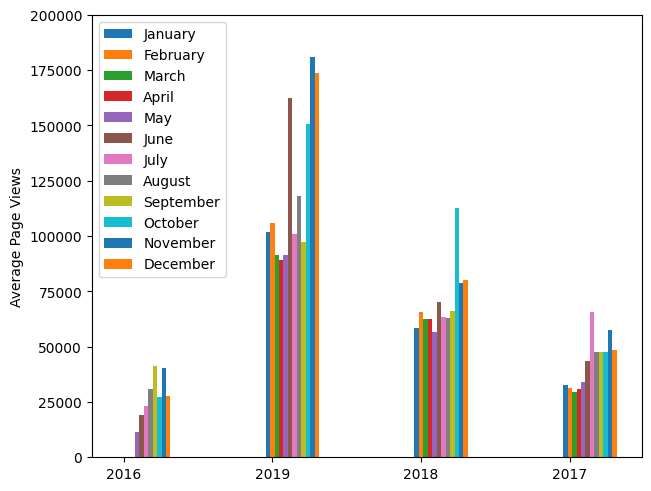

In [51]:
draw_bar_plot()

In [85]:
import seaborn as sns

def draw_box_plot():
    # prepare data
    df_box = df.copy()
    df_box.reset_index(inplace=True)

    # draw box plots (using Seaborn)
    fig, axs = plt.subplots(1, 2)
    sns.boxplot(data=df_box, x='year', y='value', ax=axs[0])
    sns.boxplot(data=df_box, x='month', y='value', ax=axs[1])
    axs[0].title.set_text("Year-wise Box Plot (Trend)")
    axs[1].title.set_text("Month-wise Box Plot (Seasonality)")

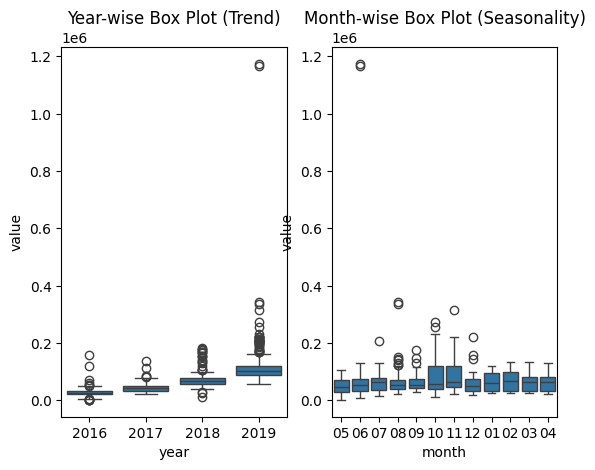

In [86]:
draw_box_plot()